In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'plotly'

In [ ]:
#Importamos los datasets.

credits_df = pd.read_csv("credits_df.csv")

titles_df = pd.read_csv("titles_df.csv")

In [ ]:
credits_df.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [ ]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [ ]:
#Eliminamos los espacios en blanco al inicio y al final de las columnas 'name' y 'role' y lo dejamos todo en minuscula en el dataset de credits_df.

credits_df["name"] = credits_df["name"].str.lower().str.strip()

credits_df["role"] = credits_df["role"].str.lower().str.strip()

In [ ]:
#Nos quedamos con todos los id que empiezan por 'tm', ya que son los id que identifican a las películas en el dataset de credits_df.

credits_df = credits_df[credits_df["id"].str.startswith("tm") == True]

credits_df = credits_df.reset_index(drop = True)

In [ ]:
#Eliminamos la columna character, ya que no es relevante para el objetivo del proyecto en el dataset de credits_df.

columns_to_drop_credits = ["character"]

credits_df = credits_df.drop(columns = columns_to_drop_credits, axis = 1)

In [ ]:
credits_df

,person_id,id,name,role
0,3748,tm84618,robert de niro,actor
1,14658,tm84618,jodie foster,actor
2,7064,tm84618,albert brooks,actor
3,3739,tm84618,harvey keitel,actor
4,48933,tm84618,cybill shepherd,actor
...,...,...,...,...
63086,736339,tm1059008,adelaida buscato,actor
63087,399499,tm1059008,luz stella luengas,actor
63088,373198,tm1059008,inés prieto,actor
63089,378132,tm1059008,isabel gaona,actor


In [ ]:
titles_df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179


In [ ]:
titles_df.shape

(5850, 15)

In [ ]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [ ]:
titles_df.nunique()

id                      5850
title                   5798
type                       2
description             5829
release_year              63
age_certification         11
runtime                  202
genres                  1726
production_countries     452
seasons                   26
imdb_id                 5447
imdb_score                80
imdb_votes              3880
tmdb_popularity         4889
tmdb_score               394
dtype: int64

In [ ]:
titles_df["age_certification"].unique()

array(['TV-MA', 'R', 'PG', nan, 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

In [ ]:
titles_df["title"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5845    False
5846    False
5847    False
5848    False
5849    False
Name: title, Length: 5850, dtype: bool

In [ ]:
titles_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5845    False
5846    False
5847    False
5848    False
5849    False
Length: 5850, dtype: bool

In [ ]:
#Eliminamos SHOW de la columna 'type' en el dataset de titles_df.

new_type = ["MOVIE"]

titles_df = titles_df[titles_df["type"].isin(new_type) == True]

In [ ]:
#Eliminamos las columnas 'type', 'seasons', 'age_certification' e 'imdb_id' del dataset titles_df porque no son relevantes para el objetivo del proyecto.

columns_to_drop = ["type", "age_certification", "seasons", "imdb_id", "tmdb_popularity"]

titles_df = titles_df.drop(columns = columns_to_drop, axis = 1)

In [ ]:
titles_df.nunique()

id                      3744
title                   3724
description             3734
release_year              62
runtime                  197
genres                  1105
production_countries     418
imdb_score                74
imdb_votes              2747
tmdb_score               266
dtype: int64

In [ ]:
#Eliminamos el único título nulo que existe en el dataset de titles_df.

titles_df = titles_df.dropna(subset = ["title"])

titles_df["title"].isnull().sum()

0

In [ ]:
#Descartamos que haya títulos duplicados que tengan el mismo año de lanzamiento.

grouped = titles_df[["title", "release_year"]]

grouped.duplicated().sum()

0

In [ ]:
""" Eliminamos las filas que no tienen género:
- Creamos un nuevo dataframe solo con las columnas 'title' y 'genres'.
- Creamos una lista vacía para añadir el id de los registros sin género.
- Quitamos corchetes y comillas de los géneros y creamos una lista nueva que tome cada palabra por separado.
- Si la lista está vacía, la añadimos a la nueva lista.
- Reseteamos el índice.
- Eliminamos las filas sin género del dataframe principal.

"""
grouped_2 = titles_df[["title", "genres"]].reset_index(drop = True)
grouped_2

id_to_erase = []

for name in range(0, len(grouped_2)):
    l = grouped_2.iloc[name]["genres"].replace('[', "").replace("]", "").replace("'", "").split(", ")
    if l[0] == "":
        id_to_erase.append(name)

titles_df.reset_index(drop = True, inplace = True)

titles_df = titles_df.drop(id_to_erase, axis = 0).dropna(subset = "genres")

titles_df = titles_df.reset_index(drop = True)


In [ ]:
#Transformamos los datos de 'genres' a una lista.

list_genre = []

for name in range(0, len(titles_df)):
    list_genre.append(titles_df.iloc[name]["genres"].replace('[', "").replace("]", "").replace("'", "").split(", "))

titles_df["genres"] = list_genre

In [ ]:
#Transformamos los datos de production_countries a una lista.

list_country = []

for name in range(0, len(titles_df)):
    list_country.append(titles_df.iloc[name]["production_countries"].replace('[', "").replace("]", "").replace("'", "").split(", "))

titles_df["production_countries"] = list_country

In [ ]:
#Eliminamos los espacios en blanco al inicio y al final y lo dejamos todo en minuscula en las columnas 'title' y 'description' en el dataset de titles_df.

titles_df["title"] = titles_df["title"].str.lower().str.strip()

titles_df["description"] = titles_df["description"].str.lower().str.strip()

In [ ]:
#Comprobamos que todos los anyos están compuestos por 4 dígitos.

id_to_erase = []

for name in range(0, len(titles_df)):
    year = str(titles_df.iloc[name]["release_year"])
    
    if len(year) != 4:
        id_to_erase.append(name)


id_to_erase

[]

In [ ]:
credits_df

,person_id,id,name,role
0,3748,tm84618,robert de niro,actor
1,14658,tm84618,jodie foster,actor
2,7064,tm84618,albert brooks,actor
3,3739,tm84618,harvey keitel,actor
4,48933,tm84618,cybill shepherd,actor
...,...,...,...,...
63086,736339,tm1059008,adelaida buscato,actor
63087,399499,tm1059008,luz stella luengas,actor
63088,373198,tm1059008,inés prieto,actor
63089,378132,tm1059008,isabel gaona,actor


In [ ]:
#Extraemos 1 vez cada id y lo metemos en una lista.

id=credits_df.id.unique()

In [ ]:
#Creamos un nuevo data-frame con el id de la película y los nombres de actores y directores.

df_unique_film = pd.DataFrame(index = id, columns = ["names","directors"])

In [ ]:
#Rellenamos las columnas de nobres de actores y de directores

for i in df_unique_film.index:
    df_unique_film.loc[i,"names"] = list(credits_df[(credits_df["id"] == i) & (credits_df["role"] == "actor")]["name"])
    df_unique_film.loc[i,"directors"] = list(credits_df[(credits_df["id"] == i) & (credits_df["role"] == "director")]["name"])

In [ ]:
df_unique_film

,names,directors
tm84618,"[robert de niro, jodie foster, albert brooks, ...",[martin scorsese]
tm154986,"[jon voight, burt reynolds, ned beatty, ronny ...",[john boorman]
tm127384,"[graham chapman, john cleese, eric idle, terry...","[terry jones, terry gilliam]"
tm120801,"[lee marvin, ernest borgnine, charles bronson,...",[robert aldrich]
tm70993,"[graham chapman, john cleese, terry gilliam, e...",[terry jones]
...,...,...
tm1216735,[],[joe penney]
tm985215,"[maymay entrata, edward barber, snooky serna, ...",[barry gonzalez]
tm1097142,"[ahmed hatem, jamila awad, mahmoud al-bezzawy,...",[mohamed bakir]
tm1014599,"[richard mofe-damijo, ego nwosu, keppy ekpenyo...",[seyi babatope]


In [ ]:
""" Esta alternativa para crear nuevas columnas con los actores y directores tardaba mucho en ejecutarse, así que se descartó al encontrar la anternativa anterior.
df = credits_df.head(1000)
diccionario_actores = {}
diccionario_directores = {}
for id in df["id"]:
    list_actors = []
    list_director = []
    for i in range(0, len(df)):
        if df.iloc[i]["id"] == id:
            if df.iloc[i]["role"] == "actor":
                list_actors.append(df.iloc[i]["name"])
            elif df.iloc[i]["role"] == "director":
                list_director.append(df.iloc[i]["name"])
    diccionario_actores[id] = list_actors
    diccionario_directores[id] = list_director    
"""

'\ndf = credits_df.head(1000)\ndiccionario_actores = {}\ndiccionario_directores = {}\nfor id in df["id"]:\n    list_actors = []\n    list_director = []\n    for i in range(0, len(df)):\n        if df.iloc[i]["id"] == id:\n            if df.iloc[i]["role"] == "actor":\n                list_actors.append(df.iloc[i]["name"])\n            elif df.iloc[i]["role"] == "director":\n                list_director.append(df.iloc[i]["name"])\n    diccionario_actores[id] = list_actors\n    diccionario_directores[id] = list_director    \n'

In [ ]:
#Reseteamos el índice del dataset original.

titles_df.set_index('id', inplace = True)

In [ ]:
#Unimos el nuevo dataset al original de titles_df para tener toda la información relevante para el objetivo del proyecto en un mismo dataframe.

total_df = pd.merge(titles_df, df_unique_film, how = 'left', left_index = True, right_index = True)

In [ ]:
total_df

,title,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_score,names,directors,score
id,,,,,,,,,,,,
tm84618,taxi driver,a mentally unstable vietnam war veteran works ...,1976,114,"[drama, crime]",[US],8.2,808582.0,8.2,"[robert de niro, jodie foster, albert brooks, ...",[martin scorsese],8.2
tm154986,deliverance,intent on seeing the cahulawassee river before...,1972,109,"[drama, action, thriller, european]",[US],7.7,107673.0,7.3,"[jon voight, burt reynolds, ned beatty, ronny ...",[john boorman],7.5
tm127384,monty python and the holy grail,"king arthur, accompanied by his squire, recrui...",1975,91,"[fantasy, action, comedy]",[GB],8.2,534486.0,7.8,"[graham chapman, john cleese, eric idle, terry...","[terry jones, terry gilliam]",8.0
tm120801,the dirty dozen,12 american military prisoners in world war ii...,1967,150,"[war, action]","[GB, US]",7.7,72662.0,7.6,"[lee marvin, ernest borgnine, charles bronson,...",[robert aldrich],7.6
tm70993,life of brian,"brian cohen is an average young jewish man, bu...",1979,94,[comedy],[GB],8.0,395024.0,7.8,"[graham chapman, john cleese, terry gilliam, e...",[terry jones],7.9
...,...,...,...,...,...,...,...,...,...,...,...,...
tm1066324,super monsters: once upon a rhyme,the super monsters rethink exemplary fantasies...,2021,25,"[animation, family]",[],5.6,38.0,6.3,NaN,NaN,5.9
tm1097142,my bride,the story follows a young man and woman who go...,2021,93,"[romance, comedy, drama]",[EG],5.0,327.0,5.3,"[ahmed hatem, jamila awad, mahmoud al-bezzawy,...",[mohamed bakir],5.2
tm1014599,fine wine,a beautiful love story that can happen between...,2021,100,"[romance, drama]",[NG],6.8,45.0,NaN,"[richard mofe-damijo, ego nwosu, keppy ekpenyo...",[seyi babatope],6.8


In [ ]:
#Redondeamos tmdb_score a un dígito.

total_df["tmdb_score"] = total_df["tmdb_score"].round(1)

In [ ]:
#Calculamos la media de los dos tipos de valoraciones incluidos en el dataset y creamos una nueva columna con ese valor.

total_df["score"] = total_df[['imdb_score', 'tmdb_score']].mean(axis = 1).round(1)

In [ ]:
total_df.isnull().sum()

title                     0
description               5
release_year              0
runtime                   0
genres                    0
production_countries      0
imdb_score              283
imdb_votes              297
tmdb_score              182
names                    84
directors                84
score                    40
dtype: int64

In [ ]:
#Convertirmos los valores de la columna 'production_countries' en una lista.

paises = total_df["production_countries"].apply(lambda x: ','.join(x)).str.get_dummies(sep = ",")

In [ ]:
#Sumamos cada uno de los países para conocer cuáles son los principales mercados de producción de películas para Netflix.

pais = paises.sum()

In [ ]:
#Tomamos tan solo los 15 principales países.

pa = pais.sort_values(ascending = False).head(15)

In [ ]:
to = total_df.dropna(subset = "directors")

In [ ]:
total_df["genres"]

id
tm84618                           [drama, crime]
tm154986     [drama, action, thriller, european]
tm127384               [fantasy, action, comedy]
tm120801                           [war, action]
tm70993                                 [comedy]
                            ...                 
tm1066324                    [animation, family]
tm1097142               [romance, comedy, drama]
tm1014599                       [romance, drama]
tm898842                                 [drama]
tm1059008                               [comedy]
Name: genres, Length: 3710, dtype: object

In [ ]:
too = to["names"].apply(lambda x: ','.join(x)).str.get_dummies(sep = ",")

In [ ]:
dire = to["directors"].apply(lambda x: ','.join(x)).str.get_dummies(sep = ",")

In [ ]:
dee = dire.sum()

In [ ]:
de = too.sum()

In [ ]:
direct = dee.sort_values(ascending = False).head(25)

In [ ]:
act = de.sort_values(ascending = False).head(30)

In [ ]:
generos_df = total_df["genres"].apply(lambda x: ','.join(x)).str.get_dummies(sep = ",")

In [ ]:
ddd = generos_df.sum()

In [ ]:
ddd

action            718
animation         282
comedy           1571
crime             545
documentation     611
drama            1876
european          344
family            351
fantasy           315
history           145
horror            261
music             191
reality             9
romance           698
scifi             204
sport             113
thriller          825
war               103
western            28
dtype: int64

In [ ]:
#En este gráfico circular podemos observar los principales mercados de producción de películas para Netflix.

fig = go.Figure(data = [go.Pie(labels = list(pa.index), values = list(pa.values))])

fig.show()

In [ ]:
fig = go.Figure(data = [go.Pie(labels = list(direct.index), values = list(direct.values))])
fig.show()

In [ ]:
fig = go.Figure(data = [go.Pie(labels = list(act.index), values = list(act.values))])
fig.show()

In [ ]:
fig = go.Figure(data = [go.Pie(labels = list(ddd.index), values = list(ddd.values))])
fig.show()

In [ ]:
dff = pd.merge(generos_df, total_df, how = 'left', left_index = True, right_index = True)

In [ ]:
dff.select_dtypes([float, int, bool])

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,...,sport,thriller,war,western,release_year,runtime,imdb_score,imdb_votes,tmdb_score,score
id,,,,,,,,,,,,,,,,,,,,,
tm84618,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1976,114,8.2,808582.0,8.2,8.2
tm154986,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1972,109,7.7,107673.0,7.3,7.5
tm127384,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1975,91,8.2,534486.0,7.8,8.0
tm120801,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1967,150,7.7,72662.0,7.6,7.6
tm70993,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1979,94,8.0,395024.0,7.8,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tm1066324,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,2021,25,5.6,38.0,6.3,5.9
tm1097142,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,2021,93,5.0,327.0,5.3,5.2
tm1014599,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2021,100,6.8,45.0,NaN,6.8


In [ ]:
dff.columns

Index(['action', 'animation', 'comedy', 'crime', 'documentation', 'drama',
       'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
       'title', 'description', 'release_year', 'runtime', 'genres',
       'production_countries', 'imdb_score', 'imdb_votes', 'tmdb_score',
       'names', 'directors', 'score'],
      dtype='object')

In [ ]:
dff.unstack(['action', 'animation', 'comedy', 'crime', 'documentation', 'drama',
       'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western'])

KeyError: 'Requested level (action) does not match index name (id)'

In [ ]:
dff.pivot(index = list(generos_df.columns), columns = dff.index)

ValueError: operands could not be broadcast together with shapes (19,) (3710,) 

c:\Users\germa\anaconda3\envs\proyecto_4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\germa\anaconda3\envs\proyecto_4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\germa\anaconda3\envs\proyecto_4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\germa\anaconda3\envs\proyecto_4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

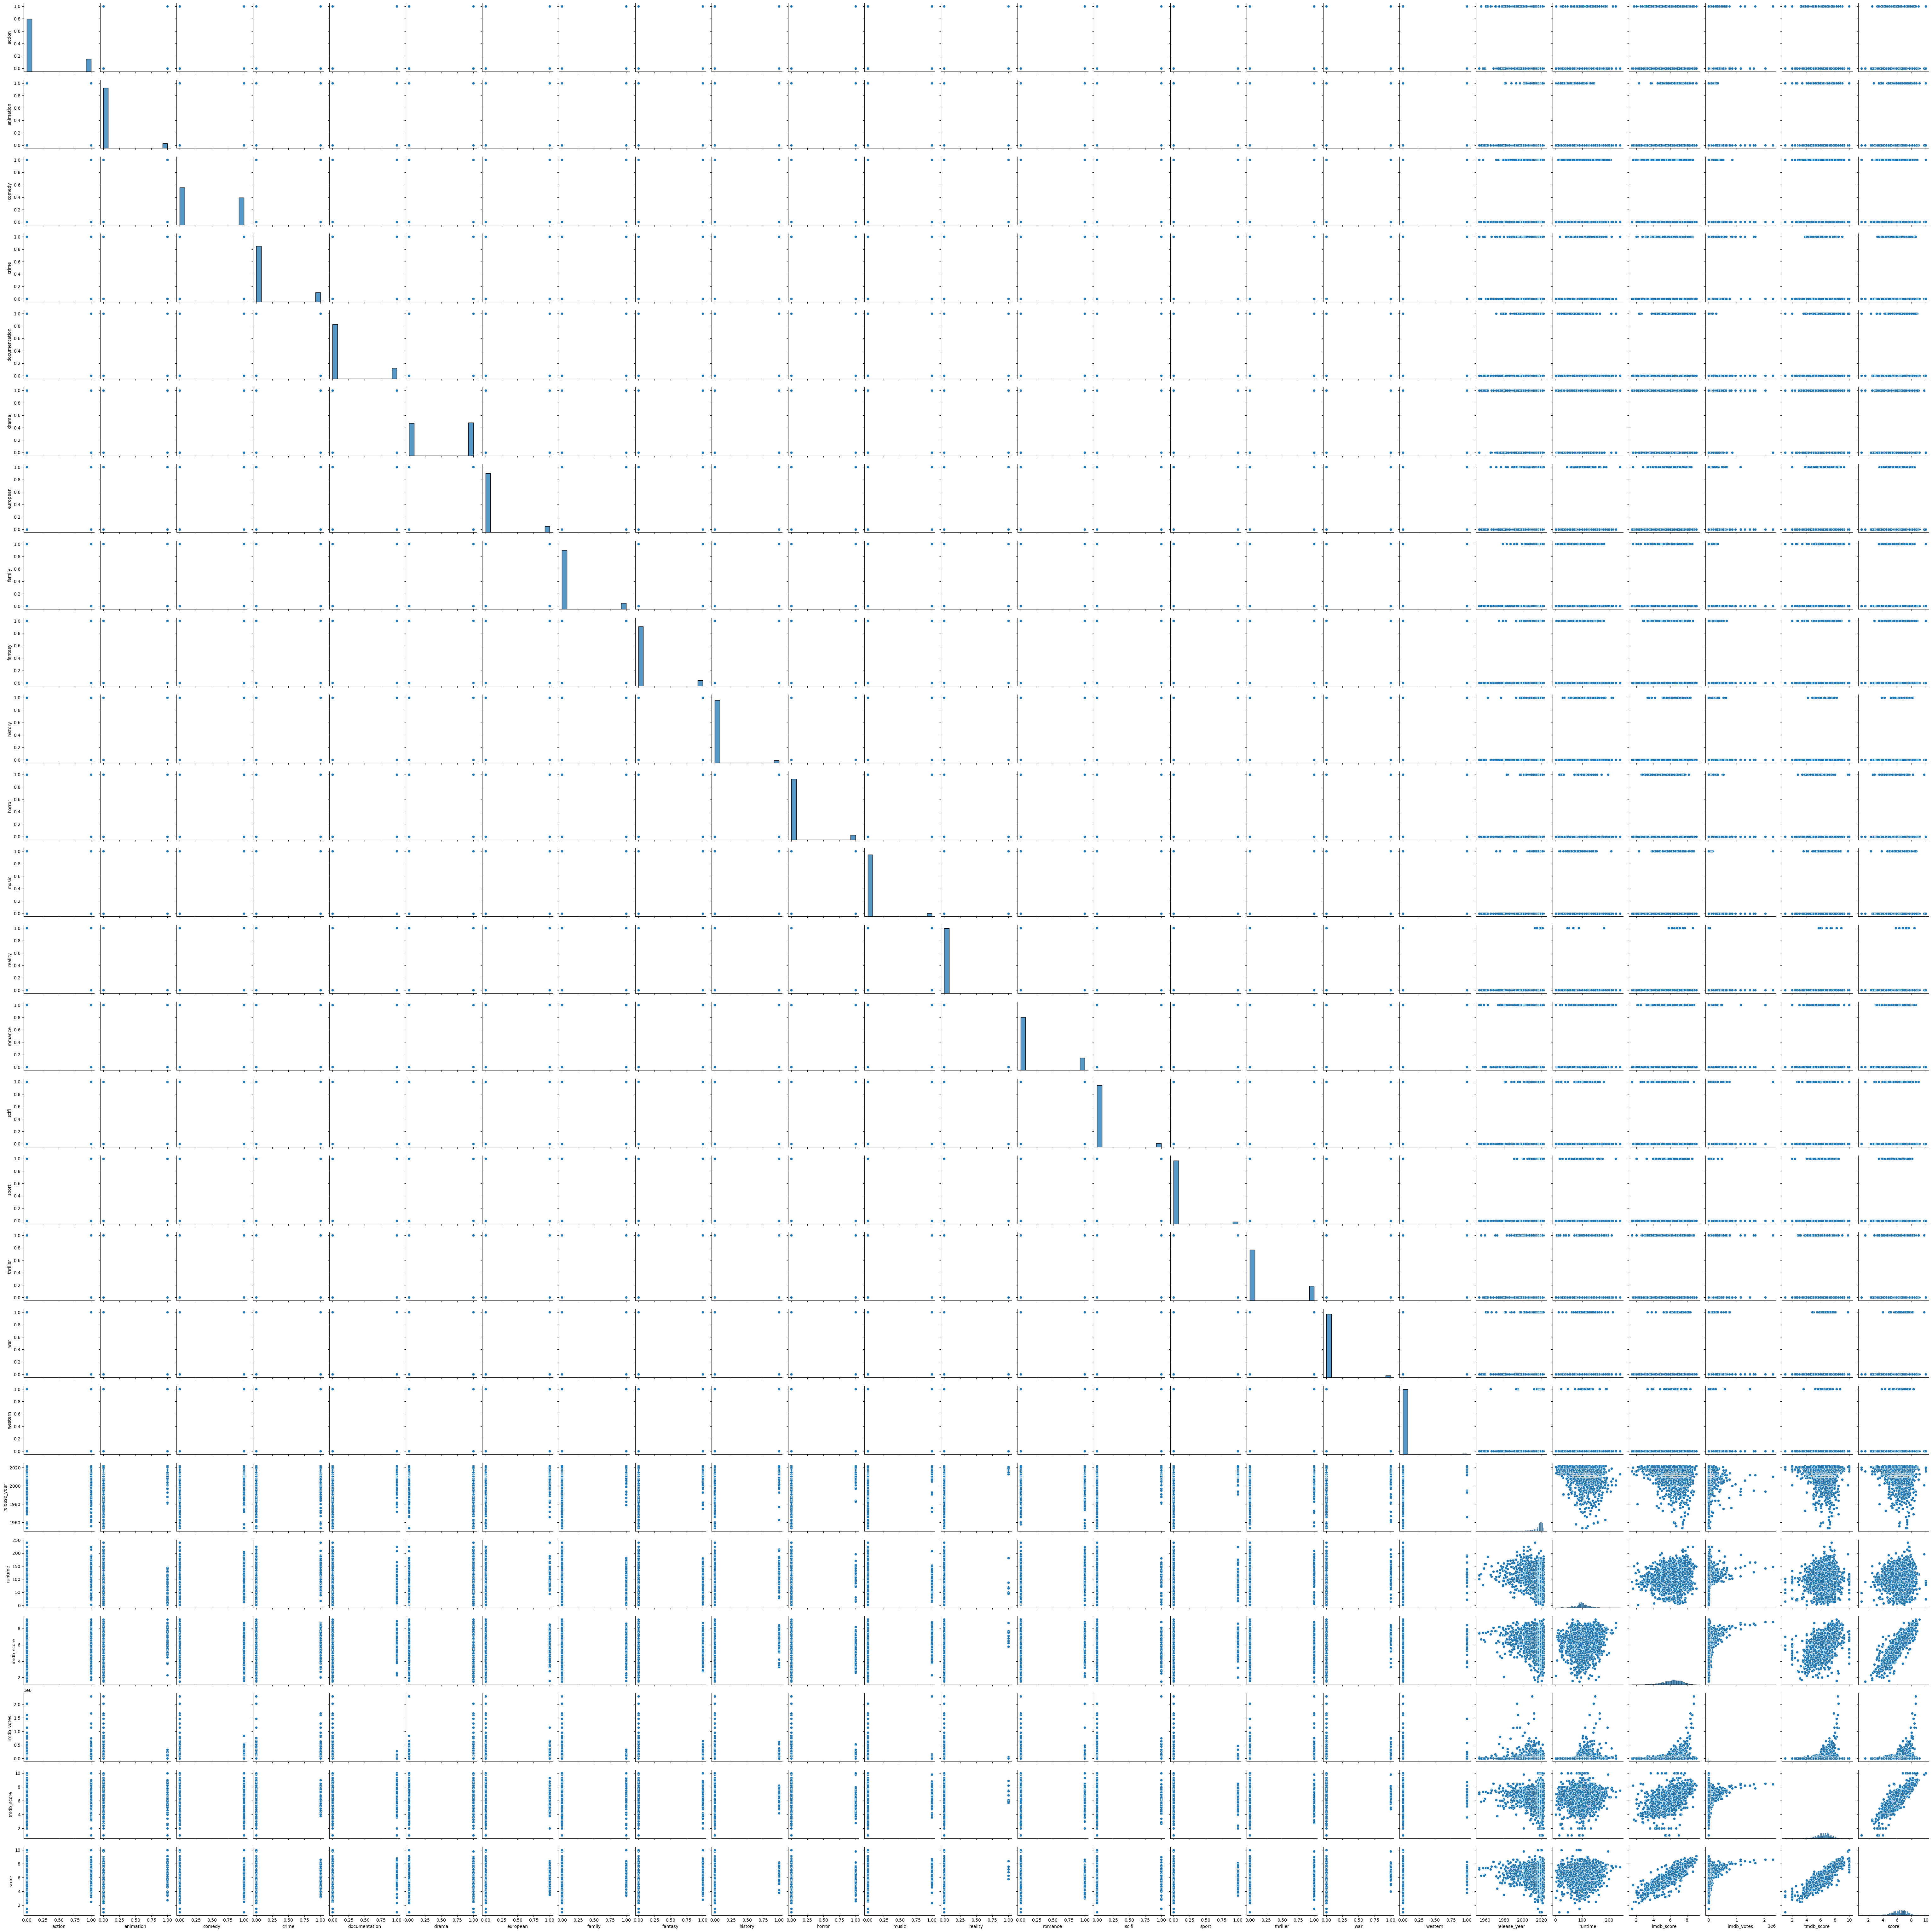

In [ ]:
sns.pairplot(dff.select_dtypes([float, int, bool]))

In [ ]:
dd = dff.select_dtypes([float, int, bool]).corr()

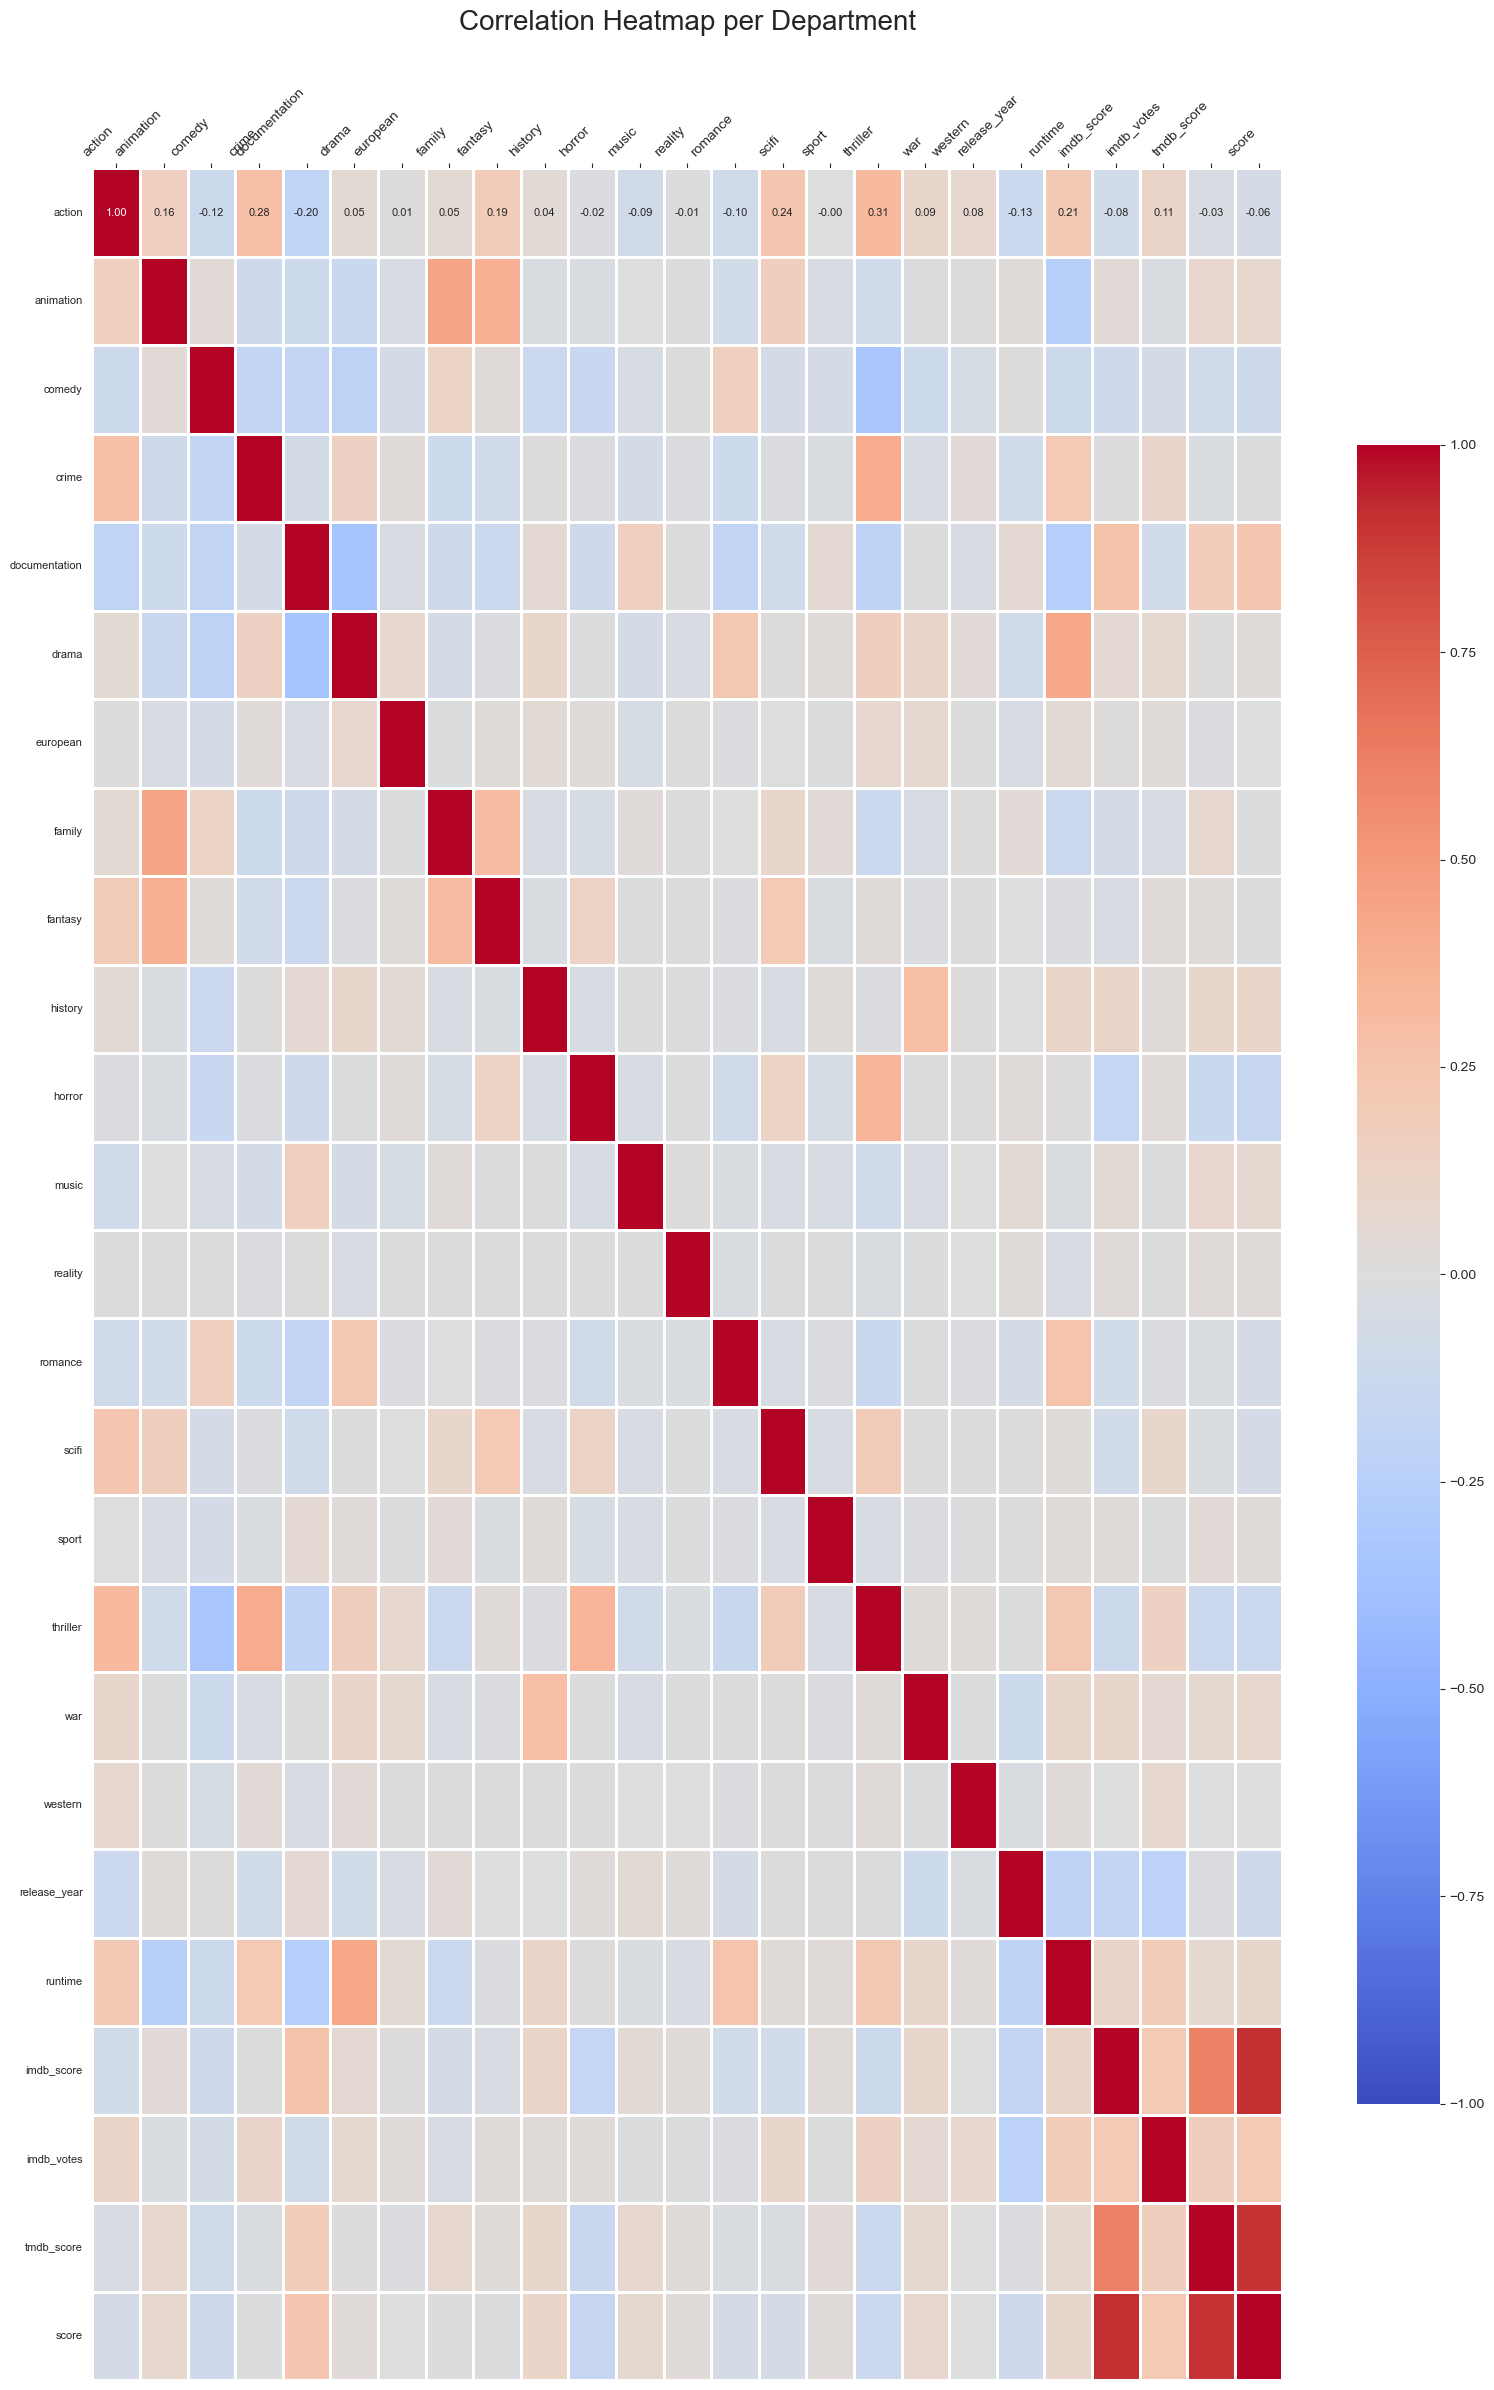

In [ ]:
# Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(16, 24))  # Adjusted the size for a vertical orientation
heatmap = sns.heatmap(dd, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, linewidths = 1, linecolor = 'white',
            cbar_kws = {"shrink": 0.75}, fmt = ".2f", annot_kws = {"size": 8})  # Reduced annot size for better fit
heatmap.xaxis.set_ticks_position('top')  # Set the X-axis labels on top
plt.title('Correlation Heatmap per Department', fontsize = 20, pad = 40)  # Adjusted padding to accommodate top x-labels
plt.xticks(fontsize = 10, rotation = 45, ha = 'right')
plt.yticks(fontsize = 8, rotation = 0)
plt.tight_layout()
plt.show()